# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset
2 [WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_1'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_11'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_13'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_15'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_17'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_19'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_21'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Far_field_time_history_dataset/L13_23'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_hist

In [3]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Mass', 'Standoff distance', 'Time', 'Phase', 'Pressure'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx") if 36 < int(file_train.stem[1:]) < 50)
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_1
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_11
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_13
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_15
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_17
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_19
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_21
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_23
P37
P41
P45
P49
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Far_field_time_history_dataset\L13_25


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22355 entries, 0 to 22354
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               22355 non-null  float64
 1   Standoff distance  22355 non-null  int64  
 2   Time               22355 non-null  float64
 3   Phase              22355 non-null  object 
 4   Pressure           22355 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 873.4+ KB


In [5]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'], dtype = np.uint8)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22355 entries, 0 to 22354
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               22355 non-null  float64
 1   Standoff distance  22355 non-null  int64  
 2   Time               22355 non-null  float64
 3   Pressure           22355 non-null  float64
 4   Phase_negative     22355 non-null  uint8  
 5   Phase_positive     22355 non-null  uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 742.4 KB


In [6]:
dataset_train.head(30)

,Mass,Standoff distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,19,50.939649,3.495164,0,1
1,0.5,19,50.949942,3.468648,0,1
2,0.5,19,50.959826,3.391961,0,1
3,0.5,19,50.969709,3.425727,0,1
4,0.5,19,50.979588,3.429492,0,1
5,0.5,19,50.989885,3.400727,0,1
6,0.5,19,50.999768,3.392477,0,1
7,0.5,19,51.009648,3.391555,0,1
8,0.5,19,51.019944,3.370094,0,1
9,0.5,19,51.029824,3.357664,0,1


In [7]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(22355, 5) (22355,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[-0.51393853  0.19192579  0.19873147  1.          0.        ]
 [-1.21655942  0.19192579  0.60194141  1.          0.        ]
 [ 1.2426137   0.19192579  1.00693675  1.          0.        ]
 ...
 [ 0.27650997  0.89644156  1.62700756  1.          0.        ]
 [ 0.4521652   0.42676438  0.84754008  1.          0.        ]
 [-0.60176614  0.42676438  1.06395502  1.          0.        ]]


In [12]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-1.12873181 -1.92162151 -1.68034441  1.          0.        ]
 [-1.12873181 -1.68678292 -1.45135258  1.          0.        ]
 [-1.12873181 -1.92162151 -1.66911938  1.          0.        ]
 ...
 [-0.68959375  0.42676438 -0.12230642  0.          1.        ]
 [ 0.80347564  0.66160297  0.60597287  1.          0.        ]
 [ 0.89130325  0.19192579 -0.62519388  0.          1.        ]]


In [13]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[ 1.15478609  0.42676438  0.88481216  1.          0.        ]
 [ 1.72566556  0.19192579 -0.35174861  0.          1.        ]
 [ 1.2426137   0.89644156  0.09949854  0.          1.        ]
 ...
 [ 1.06695848  0.19192579  0.6513206   1.          0.        ]
 [-1.12873181 -1.92162151 -1.71895877  1.          0.        ]
 [ 0.18868236  0.19192579 -0.54392625  0.          1.        ]]


In [14]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 13413
X_test 4471
X_val 4471


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=125,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=100,
                              activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               900       
                                                                 
 dense_1 (Dense)             (None, 125)               18875     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 32,476
Trainable params: 32,476
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
448/448 [==============================] - 33s 71ms/step - loss: 4.7021 - mae: 1.3497 - val_loss: 0.7162 - val_mae: 0.6346
Epoch 2/500
448/448 [==============================] - 2s 4ms/step - loss: 0.5667 - mae: 0.4992 - val_loss: 0.5415 - val_mae: 0.4515
Epoch 3/500
448/448 [==============================] - 2s 4ms/step - loss: 0.4816 - mae: 0.4143 - val_loss: 0.4699 - val_mae: 0.4113
Epoch 4/500
448/448 [==============================] - 2s 4ms/step - loss: 0.4661 - mae: 0.3990 - val_loss: 0.5173 - val_mae: 0.4647
Epoch 5/500
448/448 [==============================] - 2s 4ms/step - loss: 0.4626 - mae: 0.3909 - val_loss: 0.4622 - val_mae: 0.3987
Epoch 6/500
448/448 [==============================] - 2s 5ms/step - loss: 0.4409 - mae: 0.3748 - val_loss: 0.4858 - val_mae: 0.4196
Epoch 7/500
448/448 [==============================] - 5s 12ms/step - loss: 0.4390 - mae: 0.3772 - val_loss: 0.4020 - val_mae: 0.3361
Epoch 8/500
448/448 [==============================] - 3s 7ms/step

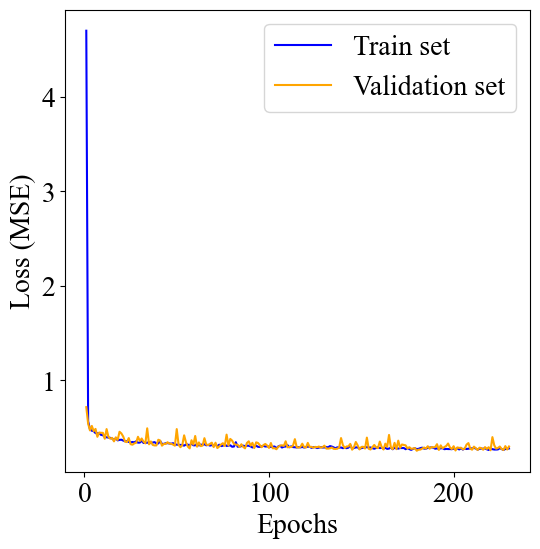

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section5_ANN1_2.png', dpi=200, bbox_inches='tight')
plt.show()

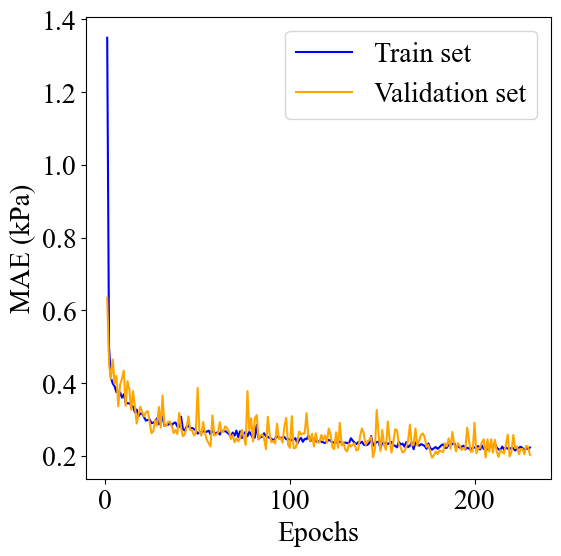

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (kPa)')
plt.legend()
plt.savefig('Section5_ANN1_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [24]:
print (epochs)

range(1, 231)


In [25]:
ann.save('Section5_new_ANN_1')
import pickle
pickle.dump(sc, open('Section5_new_scaler_ANN_1.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section5_new_ANN_1\assets


## Part 5 - Make predictions

140/140 [==============================] - 0s 2ms/step


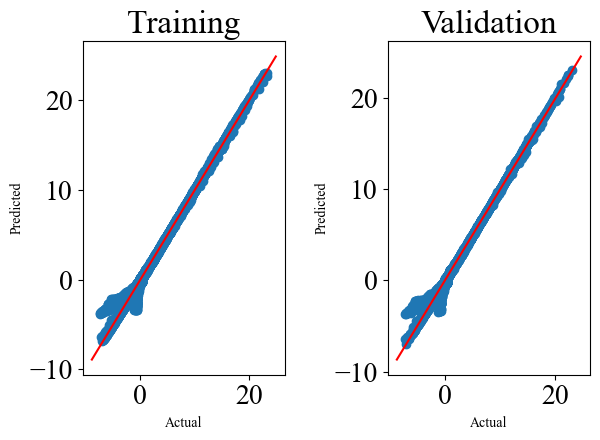

In [26]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()
plt.savefig('Section5_ANN1_1.png', dpi=200, bbox_inches='tight')
# show the plot
plt.show()

In [27]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

140/140 [==============================] - 0s 2ms/step
[[ 0.12  0.2 ]
 [ 0.89  0.96]
 [ 0.25  0.25]
 ...
 [ 8.32  8.38]
 [-4.29 -4.33]
 [19.53 19.36]]


Text(0, 0.5, 'Predicted data')

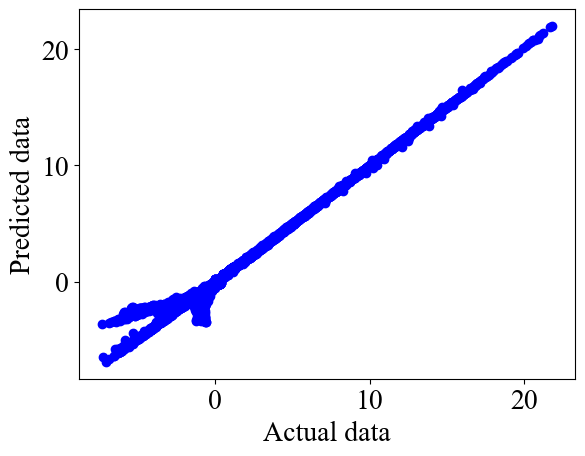

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

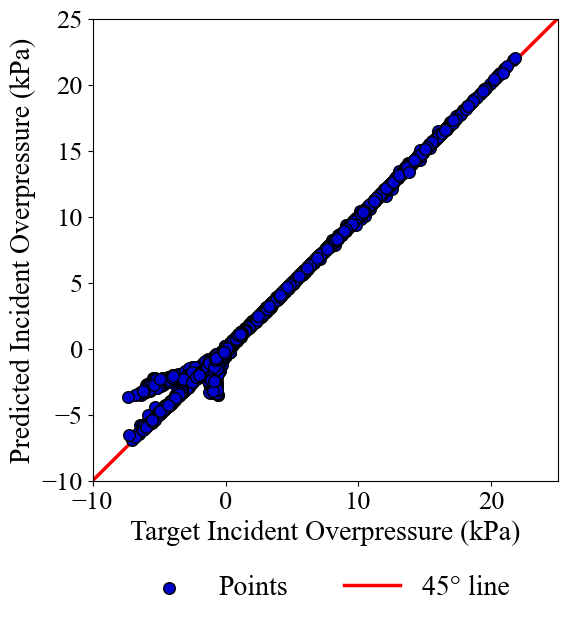

In [38]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

b_l = -10
u_l = 25

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Overpressure (kPa)')
plt.xlabel('Target Incident Overpressure (kPa)')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Section5_ANN1.png', dpi=200, bbox_inches='tight')

In [30]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

420/420 [==============================] - 1s 2ms/step
0.20128797820584193
0.2037499103223893


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9909042383929866


In [32]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9917801916032833


In [33]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 41.78%
Within 10% margin 48.11%
Within 20% margin 51.80%
Out of 20% margin 48.20%


In [34]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9908940527696865


In [35]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.5028003506206787

In [36]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.2037499103223893